# **Importation**

In [16]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from tqdm import tqdm
tqdm.pandas()
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
arabic_stopwords = set(stopwords.words("arabic"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Data Preprocessing**

### **Regular Expression**

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/news_nlp.csv")
df.head()

,source,category,datetime,title,content,link
0,Mosaique,National,2024-02-13 21:45:00,وزارة الثقافة: 'معرض الكتاب في موعده.. بتعليما...,أعلنت وزارة الشؤون الثقافية في بلاغ نشرته مساء...,https://www.mosaiquefm.net/ar/%D8%AA%D9%88%D9%...
1,Mosaique,National,2024-02-13 21:10:00,رئيس الحكومة يلتقي رؤساء بعثات فنية ومالية دول...,دعا رئيس الحكومة أحمد الحشاني خلال لقاء جمعه ب...,https://www.mosaiquefm.net/ar/%D8%AA%D9%88%D9%...
2,Mosaique,National,2024-02-13 20:50:00,حملة في بن عروس: الاستخلاص بالمآوي العشوائية ل...,أعلن أعضاء اللجنة الجهوية للسلامة المرورية ببن...,https://www.mosaiquefm.net/ar/%D8%AA%D9%88%D9%...
3,Mosaique,National,2024-02-13 20:34:00,رئيس الحكومة: المؤشرات الاقتصادية في تحسن ملحو...,استقبل رئيس الحكومة أحمد الحشّاني مساء اليوم ا...,https://www.mosaiquefm.net/ar/%D8%AA%D9%88%D9%...
4,Mosaique,National,2024-02-13 19:12:00,دوار هيشر: الاحتفاظ بحارس مؤسسة تربوية بحوزته ...,أذنت النيابة العمومية بالمحكمة الابتدائية بمنو...,https://www.mosaiquefm.net/ar/%D8%AA%D9%88%D9%...


In [7]:
# Empty content
print(f"Empty content(before): {len(df[df['content'].isna() | (df['content'].str.strip() == '')])}")
# Replace empty content with title
df['content'] = df.apply(lambda row: row['title'] if pd.isna(row['content']) or row['content'].strip() == '' else row['content'],axis=1)
print(f"Empty content(after): {len(df[df['content'].isna() | (df['content'].str.strip() == '')])}")

Empty content(before): 45
Empty content(after): 0


In [8]:
# NON Arabic content
non_arabic_mask = ~df['content'].str.contains(r'[\u0600-\u06FF]', na=False)
print(f"NON Arabic content(before): {non_arabic_mask.sum()}")
# Drop NON Arabic content
df = df[df['content'].str.contains(r'[\u0600-\u06FF]', na=False)].reset_index(drop=True)
non_arabic_mask = ~df['content'].str.contains(r'[\u0600-\u06FF]', na=False)
print(f"NON Arabic content (after): {non_arabic_mask.sum()}")

NON Arabic content(before): 16
NON Arabic content (after): 0


In [12]:
def detect_noises(df, column='content'):
    arabic_letters = "ابتثجحخدذرزسشصضطظعغفقكلمنهوي"
    all_text = ''.join(df[column].dropna().astype(str))
    noise_chars = [c for c in all_text if c not in arabic_letters]
    noise_count = sorted(Counter(noise_chars).keys())
    print(f"LEN(noises) = {len(noise_count)}")
    return noise_count

In [10]:
print(detect_noises(df, column='content'))

LEN(noises) = 225
['\t', '\n', '\x0b', ' ', '!', '"', '#', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '\xa0', '«', '®', '³', '»', 'Ç', 'É', 'à', 'á', 'â', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'î', 'ï', 'ó', 'ô', 'ö', 'ù', 'ú', 'û', 'ü', 'ă', 'č', 'ğ', 'ı', 'œ', 'ş', 'А', 'Н', '،', '؛', '؟', 'ء', 'آ', 'أ', 'ؤ', 'إ', 'ئ', 'ة', 'ـ', 'ى', 'ً', 'ٌ', 'ٍ', 'َ', 'ُ', 'ِ', 'ّ', 'ْ', 'ٓ', 'ٔ', 'ٕ', '٠', '٪', '٫', 'ٱ', 'ٸ', 'ڤ', 'ڨ', 'ک', 'ھ', 'ی', 'ۖ', 'ố', '\u200b', '\u200c', '\u200d', '\u200e', '\u200f', '–', '—', '‘', '’', '“', '”', '•', '…', '\u202a', '\u202b', '\u202c', '\u202d', '″', '‹', '›', '⁒', '\u2067', '\u2069', '℅', '™'

In [11]:
def normalize_arabic(text):
    text = str(text)
    # Normalize Alef variations
    text = re.sub(r'[إأآٱ]', 'ا', text)
    # Normalize Ya (dotless ya → normal ya)
    text = re.sub(r'[ى]', 'ی', text)
    # Normalize Ta Marbuta → Ha
    text = re.sub(r'[ة]', 'ه', text)
    # Normalize Hamza forms
    text = re.sub(r'[ٸ]', 'ئ', text)
    # Normalize other chars
    text = re.sub(r'[ڤڨ]', 'ق', text)
    text = re.sub(r'ھ', 'ه', text)
    text = re.sub(r'ک', 'ك', text)
    # Remove Tatweel
    text = re.sub(r'ـ', '', text)
    # Remove Punctuations
    text = re.sub(r'[،؛؟٠٪٫]', '', text)
    # Remove Arabic diacritics (Harakat)
    text = re.sub(r'[\u0610-\u061A\u064B-\u065F\u06D6-\u06DC\u06DF-\u06E8\u06EA-\u06ED]', '', text)
    # Remove punctuation (Arabic + English)
    text = re.sub(r'[^\u0600-\u06FF\s]', ' ', text)
    # Normalize spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [12]:
df['content_normalized'] = df['content'].apply(normalize_arabic)
print(detect_noises(df, column='content_normalized'))

LEN(noises) = 5
[' ', 'ء', 'ؤ', 'ئ', 'ی']


In [ ]:
print(df['content'].iloc[5])
print(df['content_normalized'].iloc[5])

شهد استهلاك الكحول في صفوف الرجال في تونس تراجعا بين سنتي 2023 و2018 لتبلغ نسبة الرجال المستهلكين لهذه المادة 8 بالمائة سنة 2023 مقابل 11.2 بالمائة سنة 2018 حسب ما اظهرته نتائج المسح الوطني العنقودي متعدد المؤشرات حول وضع الأم والطفل بتونس لسنة 2023.وابرز المسح، الذي اعده المعهد الوطني للاحصاء ونشره امس الاثنين، ان نسبة الرجال، الذين تناولوا علــى الأقل مشروبا كحوليا خلال الشهر الأخير قبل المسح، قد بلغت 9.6 بالمائة في المناطق الحضرية و4.9 بالمائة في المناطق الريفية في حين تم تسجيل اعلى معدل في تونس الكبرى بنسبة 13.1 بالمائة. ويتباين معدّل الاستهلاك حسب المستويين الاقتصادي والتعليمي اذ بلغ 10.3 بالمائة في صفوف الرجال الذين ينتمون الى العائلات الأكثر ثراء مقابل 5.9 بالمائة للرجال المنتمين للعائلات الأكثر فقرا. وتقدر هذه النسبة بـ8.9 بالمائة في صفوف الرجال الذين ليس لديهم مستوى تعليمي في حين تنخفض الى 5.3 بالمائة بالنسبة للرجال الذين لديهم مستوى تعليمي جامعي.وتقدر نسبة الرجـال الذين لـم يتناولـوا أبـدا مشـروبات كحوليـة 76.5 بالمائة وترتفـع هذه النسبة 96.5 في صفوف المراهقين الذين تتراوح أع

In [13]:
normalized_stopwords = [normalize_arabic(word) for word in arabic_stopwords]
df['tokens'] = df['content_normalized'].apply(lambda x: str(x).split())
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in normalized_stopwords])

In [ ]:
print(df['tokens'].iloc[5000])

['سفاره', 'امريكا', 'تحذر', 'التونسيين', 'برمجيات', 'خبيثه', 'تستخدمها', 'كوريا', 'الشماليه']


### **Build My Vocab**

In [14]:
all_tokens = [token for sublist in df['tokens'] for token in sublist]
vocab = sorted(set(all_tokens))
token_counts_no_stop = Counter(all_tokens)
print(f"Total tokens (after stop word removal & normalization): {len(all_tokens)}")
print(f"Unique tokens (vocabulary size): {len(vocab)}")
print(f"Most common tokens: {token_counts_no_stop.most_common(10)}")

Total tokens (after stop word removal & normalization): 1280267
Unique tokens (vocabulary size): 85939
Most common tokens: [('اليوم', 9902), ('تونس', 6943), ('خلال', 5727), ('رئيس', 5136), ('وفق', 4182), ('يوم', 3557), ('الوطني', 3544), ('تم', 3386), ('التونسيه', 3308), ('عدد', 3253)]


# **Seed-based sentiment scoring**

### **Lexicon Setup**

In [ ]:
lexicon = pd.read_csv("/content/drive/MyDrive/lexicon.txt", sep="\t", encoding="utf-8")
lexicon.columns = ["english","arabic","sentiment_score","positive_count","negative_count"]
lexicon = lexicon[['arabic', 'sentiment_score']]
lexicon = lexicon.dropna()
lexicon.tail()

,arabic,sentiment_score
32577,#عديم_القيمة,-6.160
32578,#فاسد,-6.211
32579,#مثير_للشفقة,-6.302
32580,#مروع,-6.764
32581,#غير_مقبول,-6.925


In [ ]:
print(detect_noises(lexicon, column='arabic'))
print(f"LEN(lexicon) = {len(lexicon)}")

LEN(noises) = 24
[' ', '#', '(', ')', '*', '-', '.', ':', '[', ']', '_', '،', '؛', '؟', 'ء', 'آ', 'أ', 'ؤ', 'إ', 'ئ', 'ة', 'ى', 'ِ', 'ّ']
LEN(lexicon) = 32582


In [ ]:
lexicon['arabic'] = lexicon['arabic'].apply(normalize_arabic)
detect_noises(lexicon, column='arabic')

LEN(noises) = 5


[' ', 'ء', 'ؤ', 'ئ', 'ی']

In [ ]:
original_lexicon = lexicon.copy()
lexicon = lexicon[lexicon['arabic'].isin(vocab)]
lexicon = lexicon.reset_index(drop=True)
print(f"LEN(lexicon in vocab (with dup)) = {len(lexicon)}")

LEN(lexicon in vocab (with dup)) = 16493


In [ ]:
positive_count = lexicon[lexicon['sentiment_score'] > 0]['arabic']
negative_count = lexicon[lexicon['sentiment_score'] < 0]['arabic']
print(f"positive_count = {len(positive_count)}")
print(f"negative_count = {len(negative_count)}")

positive_count = 9135
negative_count = 7358


In [ ]:
token_rows = lexicon[lexicon['arabic']=="رائع"]
print(token_rows,"\n")
mean_score = token_rows['sentiment_score'].max()
print(f'"رائع" sentiment_score should be : {mean_score}')

     arabic  sentiment_score
0      رائع            7.526
2      رائع            7.199
4      رائع            6.922
9      رائع            5.727
71     رائع            5.000
115    رائع            5.000
209    رائع            5.000
224    رائع            5.000
240    رائع            5.000
255    رائع            3.866
257    رائع            3.774
259    رائع            3.761
280    رائع            3.389
295    رائع            3.152
309    رائع            2.979
311    رائع            2.963
327    رائع            2.942
402    رائع            2.588
405    رائع            2.575
435    رائع            2.541
587    رائع            2.213
617    رائع            2.150
718    رائع            2.045
1031   رائع            1.682
1130   رائع            1.577
1374   رائع            1.571
4418   رائع            0.545
8245   رائع            0.125 

"رائع" sentiment_score should be : 7.526


In [ ]:
token_rows = lexicon[lexicon['arabic']=="مروع"]
print(token_rows,"\n")
mean_score = token_rows['sentiment_score'].min()
print(f'"مروع" sentiment_score should be : {mean_score}')

      arabic  sentiment_score
10252   مروع           -0.214
15043   مروع           -1.313
15622   مروع           -1.824
15679   مروع           -1.902
15746   مروع           -2.006
15906   مروع           -2.623
15921   مروع           -2.711
15933   مروع           -2.783
15944   مروع           -2.955
16090   مروع           -4.999
16199   مروع           -4.999
16482   مروع           -4.999
16489   مروع           -5.691
16492   مروع           -6.764 

"مروع" sentiment_score should be : -6.764


In [ ]:
def choose_score(scores):
    if len(scores) == 0:
        return 0
    total_score = np.sum(scores)
    if total_score > 0:
        return np.max(scores)
    elif total_score < 0:
        return np.min(scores)
    else:
        return 0

lexicon = lexicon.groupby('arabic', as_index=False)['sentiment_score'].apply(choose_score).reset_index(drop=True)
print(f"LEN(lexicon in vocab (without dup)) = {len(lexicon)}")

LEN(lexicon in vocab (without dup)) = 8765


In [ ]:
print(lexicon[lexicon['arabic']=="رائع"], "\n----------------------------")
print(lexicon[lexicon['arabic']=="مروع"])

     arabic  sentiment_score
4955   رائع            7.526 
----------------------------
     arabic  sentiment_score
7299   مروع           -6.764


In [ ]:
positive_count = lexicon[lexicon['sentiment_score'] > 0]['arabic']
negative_count = lexicon[lexicon['sentiment_score'] < 0]['arabic']
print(f"positive_count = {len(positive_count)}")
print(f"negative_count = {len(negative_count)}")

positive_count = 4938
negative_count = 3827


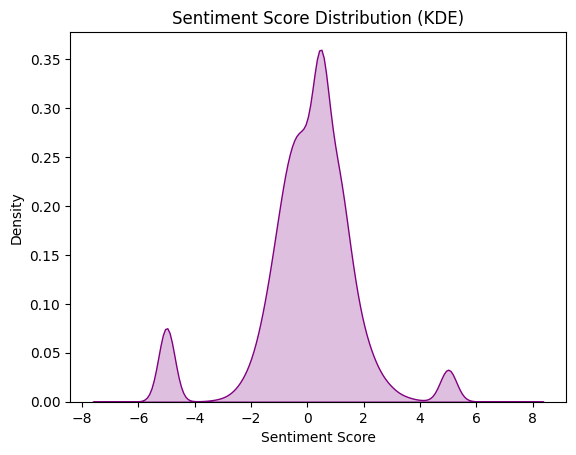

In [ ]:
sns.kdeplot(lexicon['sentiment_score'], fill=True, color='purple')
plt.title("Sentiment Score Distribution (KDE)")
plt.xlabel("Sentiment Score")
plt.show()

### **Build Lexicon Vocab**

In [ ]:
lex_tokens = [token for token in lexicon['arabic']]
lex_vocab = sorted(set(lex_tokens))
lex_token_counts = Counter(lex_tokens)
print(f"Total lexicon tokens: {len(lex_tokens)}")
print(f"Unique lexicon tokens: {len(lex_vocab)}")

Total lexicon tokens: 8765
Unique lexicon tokens: 8765


In [ ]:
filtered_df = df[df['tokens'].apply(lambda tokens: any(token in lex_vocab for token in tokens))]
print(f"LEN(original_df) = {len(df)}")
print(f"LEN(filtered_df) = {len(filtered_df)}")
print(f"{len(filtered_df)/len(df)* 100:.2f}% useful data")

LEN(original_df) = 39328
LEN(filtered_df) = 38784
98.62% useful data


In [ ]:
max_score = lexicon['sentiment_score'].max()
min_score = lexicon['sentiment_score'].min()
print(f"max_score = {max_score}")
print(f"min_score = {min_score}")

max_score = 7.526
min_score = -6.764


### **Sentiment Scoring Function**

In [ ]:
lexicon_dict = dict(zip(lexicon['arabic'], lexicon['sentiment_score']))
def sentiment_score(tokens, bias_strength=0.5):
    total_scores = []
    pos_tokens = []
    neg_tokens = []
    for token in tokens:
        score = lexicon_dict.get(token, 0)
        if score != 0:
            #print(f"Found in lexicon: {token} -> score: {score}")
            if score > 0:
                pos_tokens.append(token)
            elif score < 0:
                neg_tokens.append(token)
            total_scores.append(score)
    if not total_scores:
        return 0, pos_tokens, neg_tokens

    mean_score = np.mean(total_scores)
    # Separate positive and negative scores
    pos_scores = [s for s in total_scores if s > 0]
    neg_scores = [s for s in total_scores if s < 0]
    pos_scores.append(0)
    neg_scores.append(0)
    total_pos = sum(pos_scores)
    total_neg = sum(neg_scores)
    # Apply adjustment based on strongest token
    if pos_scores and neg_scores:
        max_pos = max(pos_scores)
        min_neg = min(neg_scores)
        #print(f"max_pos = {max_pos}")
        #print(f"min_neg = {min_neg}")
        if abs(max_pos) > abs(min_neg):
            mean_score += bias_strength * max_pos
        elif abs(max_pos) < abs(min_neg):
            mean_score -= bias_strength * abs(min_neg)
    #if len(pos_scores) = > len(neg_scores):
        # mean_score += bias_strength * max(pos_scores)
    #elif len(neg_scores) > len(pos_scores):
        # mean_score -= bias_strength * abs(min(neg_scores))
    return mean_score, pos_tokens, neg_tokens

sample_df = filtered_df[['content', 'content_normalized', 'tokens']].sample(10, random_state=9)
for _, row in sample_df.iterrows():
    print(f"content: {row['content']}")
    print(f"content: {row['content_normalized']}")
    print(f"tokens: {row['tokens']}")
    print(f"sentiment_score: {sentiment_score(row['tokens'])}")
    print(50*'-')

df[['my_sentiment_score', 'pos_tokens', 'neg_tokens']] = df['tokens'].progress_apply(
lambda tokens: pd.Series(sentiment_score(tokens))
)

content: يشهد النسيج الغابي في ولاية بنزرت اعتداءات تفاقمت حدتها خلال السنوات الأخيرة وتنوّعت مظاهرها ما بين  بناءات عشوائية وحرائق  شمل
content: يشهد النسيج الغابي في ولايه بنزرت اعتداءات تفاقمت حدتها خلال السنوات الاخيره وتنوعت مظاهرها ما بين بناءات عشوائيه وحرائق شمل
tokens: ['يشهد', 'النسيج', 'الغابي', 'ولايه', 'بنزرت', 'اعتداءات', 'تفاقمت', 'حدتها', 'خلال', 'السنوات', 'الاخيره', 'وتنوعت', 'مظاهرها', 'بناءات', 'عشوائيه', 'وحرائق', 'شمل']
sentiment_score: (np.float64(0.12724999999999997), ['النسيج'], ['خلال', 'الاخيره', 'شمل'])
--------------------------------------------------
content: غوغل تُحوّل محرك بحثها إلى مدرب لغوي
content: غوغل تحول محرك بحثها الی مدرب لغوي
tokens: ['غوغل', 'محرك', 'بحثها', 'مدرب', 'لغوي']
sentiment_score: (np.float64(1.7144999999999997), ['محرك', 'مدرب', 'لغوي'], [])
--------------------------------------------------
content: كشف وزير الخارجية نبيل عمّار في حديث لصحيفة "لوطون" السويسرية أن الأموال التونسية المجمدة في سويسرا تتجاوز 212 مليون دينار وان 
cont

100%|██████████| 39328/39328 [00:05<00:00, 7787.57it/s] 


### **Using FastText**

In [ ]:
! pip install gensim --quiet
from gensim.models import FastText
corpus = df['tokens'].tolist()


model = FastText(
    sentences=corpus,
    vector_size=50,
    window=5,
    min_count=1,
    sg=1
)

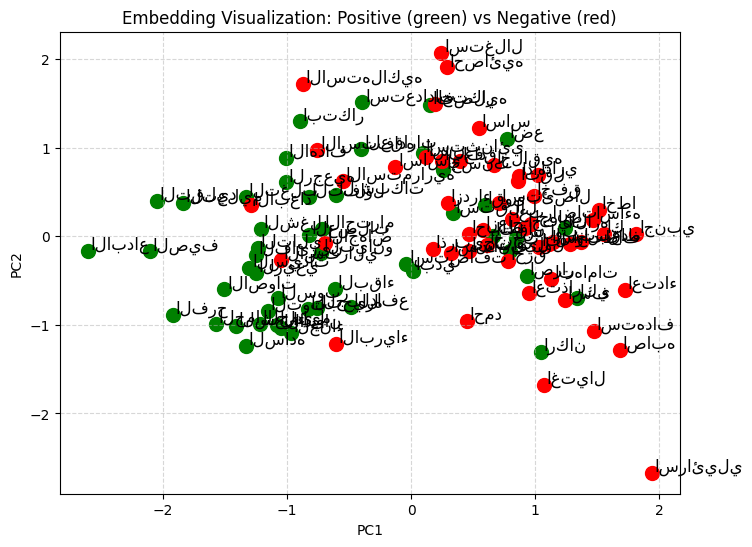

In [ ]:
from sklearn.decomposition import PCA

vocab_list = list(model.wv.index_to_key)
vocab_embeddings = np.array([model.wv[w] for w in vocab_list])

# Filter lexicon words that exist in vocab
positive_words = [w for w in lexicon[lexicon['sentiment_score'] > 3]['arabic'].tolist() if w in model.wv]
negative_words = [w for w in lexicon[lexicon['sentiment_score'] < -3]['arabic'].tolist() if w in model.wv]

# Take top 50 each
positive_words = positive_words[:50]
negative_words = negative_words[:50]

# Keep only words that exist in your vocab
positive_words = [w for w in positive_words if w in model.wv]
negative_words = [w for w in negative_words if w in model.wv]

words_to_plot = positive_words + negative_words
embeddings_to_plot = np.array([model.wv[w] for w in words_to_plot])

# --- PCA to 2D ---
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings_to_plot)  # <--- this was missing

# --- Plot ---
plt.figure(figsize=(8,6))
for i, word in enumerate(words_to_plot):
    color = 'green' if word in positive_words else 'red'
    x, y = reduced[i]
    plt.scatter(x, y, color=color, s=100)
    plt.text(x+0.02, y+0.02, word, fontsize=12)

plt.title("Embedding Visualization: Positive (green) vs Negative (red)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


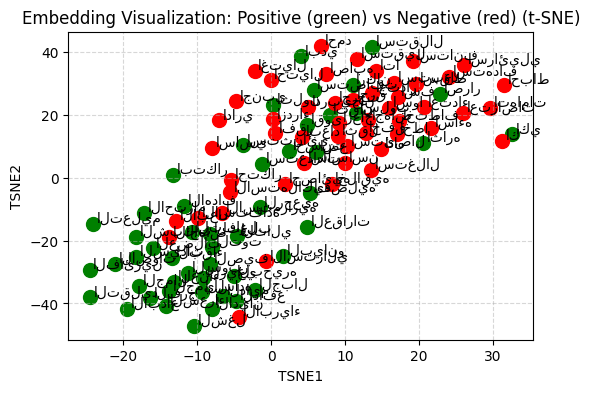

In [ ]:
from sklearn.manifold import TSNE

vocab_list = list(model.wv.index_to_key)
vocab_embeddings = np.array([model.wv[w] for w in vocab_list])

# Filter lexicon words that exist in vocab
positive_words = [w for w in lexicon[lexicon['sentiment_score'] > 3]['arabic'].tolist() if w in model.wv]
negative_words = [w for w in lexicon[lexicon['sentiment_score'] < -3]['arabic'].tolist() if w in model.wv]

# Take top 50 each
positive_words = positive_words[:50]
negative_words = negative_words[:50]

words_to_plot = positive_words + negative_words
embeddings_to_plot = np.array([model.wv[w] for w in words_to_plot])

# --- t-SNE to 2D ---
tsne = TSNE(n_components=2, random_state=42, perplexity=15, learning_rate=200)
reduced = tsne.fit_transform(embeddings_to_plot)

# --- Plot ---
plt.figure(figsize=(6,4))
for i, word in enumerate(words_to_plot):
    color = 'green' if word in positive_words else 'red'
    x, y = reduced[i]
    plt.scatter(x, y, color=color, s=100)
    plt.text(x+0.5, y+0.5, word, fontsize=10)  # slightly offset to avoid overlap

plt.title("Embedding Visualization: Positive (green) vs Negative (red) (t-SNE)")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### **Inference of sentiment scoring**

In [ ]:
pos_sentences = [
    "هذا يوم رائع وممتع",        # positive
    "أنا سعيد جدًا بهذا النجاح",
    "الطقس جميل والمزاج ممتاز"
]

neg_sentences = [
    "هذا يوم سيء و حزين",        # negative
    "أنا حزين من النتائج",
    "الطقس سيء والمزاج تعيس"
]

neut_sentences = [
    "ذهبت إلى المكتب اليوم",      # neutral
    "قرأت كتابًا في المكتبة",
    "جلست في المنزل طوال اليوم"
]

all_sentences = pos_sentences + neg_sentences + neut_sentences
sample_df = pd.DataFrame({'sample': all_sentences})

sample_df['normalized_samples'] = sample_df['sample'].apply(normalize_arabic)
sample_df['tokens'] = sample_df['normalized_samples'].str.split()

for _, row in sample_df.iterrows():
    print(f"sample: {row['sample']}")
    print(f"normalized_samples: {row['normalized_samples']}")
    print(f"tokens: {row['tokens']}")
    print(f"sentiment_score: {sentiment_score(row['tokens'])[0]}")
    print(f"pos_tokens: {sentiment_score(row['tokens'])[1]}")
    print(f"neg_tokens: {sentiment_score(row['tokens'])[2]}")
    print(50*'-')

sample: هذا يوم رائع وممتع
normalized_samples: هذا يوم رائع وممتع
tokens: ['هذا', 'يوم', 'رائع', 'وممتع']
sentiment_score: 7.9415
pos_tokens: ['يوم', 'رائع']
neg_tokens: []
--------------------------------------------------
sample: أنا سعيد جدًا بهذا النجاح
normalized_samples: انا سعيد جدا بهذا النجاح
tokens: ['انا', 'سعيد', 'جدا', 'بهذا', 'النجاح']
sentiment_score: 5.359500000000001
pos_tokens: ['سعيد', 'جدا']
neg_tokens: []
--------------------------------------------------
sample: الطقس جميل والمزاج ممتاز
normalized_samples: الطقس جميل والمزاج ممتاز
tokens: ['الطقس', 'جميل', 'والمزاج', 'ممتاز']
sentiment_score: 9.805
pos_tokens: ['جميل', 'ممتاز']
neg_tokens: []
--------------------------------------------------
sample: هذا يوم سيء و حزين
normalized_samples: هذا يوم سيء و حزين
tokens: ['هذا', 'يوم', 'سيء', 'و', 'حزين']
sentiment_score: -3.7145
pos_tokens: ['يوم']
neg_tokens: ['حزين']
--------------------------------------------------
sample: أنا حزين من النتائج
normalized_samples: ان

### **Sentiment Analysis**

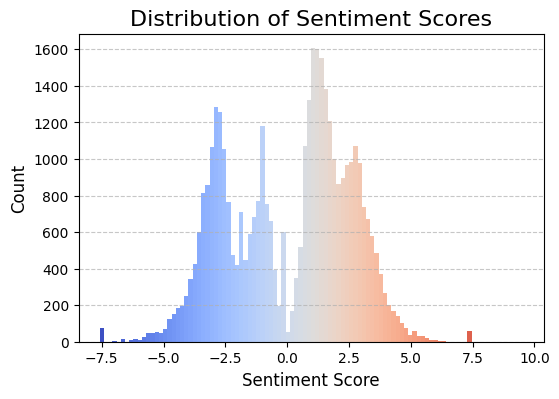

In [ ]:
# Let's plot the distribution of our sentiment classes
num_bins = 100
bins = np.linspace(df['my_sentiment_score'].min(), df['my_sentiment_score'].max(), num_bins+1)

# Digitize scores into bins
df['bin'] = np.digitize(df['my_sentiment_score'], bins)

# Generate colors for bins
colors = sns.color_palette("coolwarm", n_colors=num_bins)
df['bin_color'] = df['bin'].apply(lambda x: colors[min(x-1, num_bins-1)])

# Compute histogram counts
counts, _ = np.histogram(df['my_sentiment_score'], bins=bins)

# Plot
plt.figure(figsize=(6, 4))
for i in range(num_bins):
    plt.bar(bins[i], counts[i], width=bins[i+1]-bins[i], color=colors[i], edgecolor='none')

plt.title("Distribution of Sentiment Scores", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


> **Interpretation**

> Looking at the sentiment scores of the articles, which range from about -7.5 to 7.5, we can see a clear pattern. Most of the positive scores are clustered around slightly positive values, forming a gentle “hill,” while most negative scores are similarly centered around mildly negative values. Very few articles are truly neutral, meaning that most news carries some kind of sentiment, either good or bad. This gives the impression of two soft bell-shaped curves, one for positive news, one for negative, showing that extreme emotions are rare, and most reporting is moderate. In other words, **the news tends to lean slightly positive or slightly negative, rather than being completely neutral or extremely emotional**.

Top 5 positive words: [('سعيد', 318), ('اليوم', 278), ('كمال', 267), ('رئيس', 203), ('لقاء', 74)]
Top 5 negative words: [('غزه', 195), ('قطاع', 78), ('عجز', 78), ('حماس', 78), ('تونس', 67)]


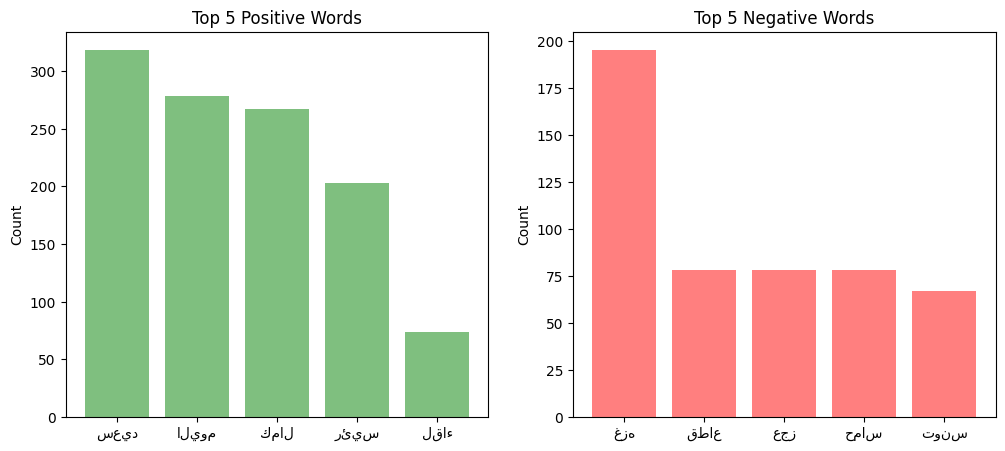

In [ ]:
# Let's plot the value counts of each of the pos and neg data & the trendy tokens
positive_tokens = []
negative_tokens = []

for _, row in df.iterrows():
    if row['my_sentiment_score'] > 4:
        positive_tokens.extend(row['pos_tokens'])
    elif row['my_sentiment_score'] < -4:
        negative_tokens.extend(row['neg_tokens'])

pos_counter = Counter(positive_tokens)
neg_counter = Counter(negative_tokens)

top5_pos = pos_counter.most_common(5)
top5_neg = neg_counter.most_common(5)

print("Top 5 positive words:", top5_pos)
print("Top 5 negative words:", top5_neg)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].bar([w for w,_ in top5_pos], [c for _,c in top5_pos], color='green', alpha=0.5)
axes[0].set_title("Top 5 Positive Words")
axes[0].set_ylabel("Count")

axes[1].bar([w for w,_ in top5_neg], [c for _,c in top5_neg], color='red', alpha=0.5)
axes[1].set_title("Top 5 Negative Words")
axes[1].set_ylabel("Count")

plt.show()

> **Interpretation**

> Based on the top tokens extracted from the corpus, we can draw some clear observations. The most frequent positive words such as "سعيد" (happy), "كمال" (perfection), "رئيس" (president), and "لقاء" (meeting) indicate that many articles **focus on governmental activities or announcements, possibly highlighting positive developments or public satisfaction regarding leadership and initiatives**. On the other hand, the most common negative words like "غزه" (Gaza), "قطاع" (strip/sector), "عجز" (failure/deficit), "حماس" (Hamas), and "تونس" **point to reporting on the ongoing conflict in Palestine and Israel, as well as societal and political challenges**.

> Overall, the sentiment analysis suggests that news coverage **tends to frame war and conflict as negative while government actions or meetings appear more positive**, reflecting the public discourse on current events and political efforts.

/tmp/ipython-input-3899034043.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


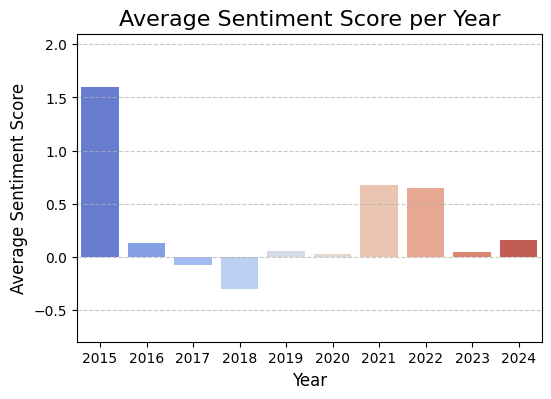

In [ ]:
# Let's plot the progress of sentiment by year
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year

# Aggregate mean sentiment by year
yearly_sentiment = df.groupby('year')['my_sentiment_score'].mean().reset_index()

# Dynamic y-axis range
ymin = yearly_sentiment['my_sentiment_score'].min() - 0.5
ymax = yearly_sentiment['my_sentiment_score'].max() + 0.5

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    x='year',
    y='my_sentiment_score',
    data=yearly_sentiment,
    palette='coolwarm'
)

plt.title("Average Sentiment Score per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Sentiment Score", fontsize=12)
plt.ylim(ymin, ymax)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


> **Interpretation**

> Looking at the mean sentiment scores per year, we can see some interesting trends. In 2015, the average sentiment was 1.60, indicating a relatively positive tone in the news, while in 2016 it dropped sharply to 0.14, and even became slightly negative in 2017 (-0.07) and 2018 (-0.30). The drop in 2020 (0.03) coincides with the COVID-19 pandemic, which naturally brought more negative or concerning news, reflecting how
global events can affect public sentiment. Before the pandemic, the population, or at least the tone of news reporting seems to have been more positive, with 2015 and 2021 (0.68) standing out as higher points. The slight increase in 2021 and 2022 (0.65) could indicate recovery in public mood or coverage.

> It’s also important to note that the number of news articles published each year can influence these averages, for example, 2015 had many more published articles than some other years, which could amplify positive sentiment, while years with fewer articles may have more variable or neutral scores. Overall, the data reflects both the natural fluctuations in sentiment over time and the impact of extraordinary events like the pandemic.

# **Topic Classification**

### **Load dataset & Normalization**

In [5]:
df = pd.read_csv("/content/drive/MyDrive/dataset.csv")
df = df[['datetime', 'category', 'title', 'sub_content']]
len(df)

66689

In [6]:
category_map = {
    "Economie": "Economy",
    "International": "International",
    "Régional": "Regional",
    "Politique": "Politic",
    "Culture": "Culture",
    "National": "National",
    "Technologie": "Technology"
}

df['category'] = df['category'].map(category_map)

# Empty sub_content
print(f"Empty sub_content(before): {len(df[df['sub_content'].isna() | (df['sub_content'].str.strip() == '')])}")
# Replace empty sub_content with title
df['sub_content'] = df.apply(lambda row: row['title'] if pd.isna(row['sub_content']) or row['sub_content'].strip() == '' else row['sub_content'],axis=1)
print(f"Empty sub_content(after): {len(df[df['sub_content'].isna() | (df['sub_content'].str.strip() == '')])}")

# NON Arabic sub_content
non_arabic_mask = ~df['sub_content'].str.contains(r'[\u0600-\u06FF]', na=False)
print(f"NON Arabic sub_content(before): {non_arabic_mask.sum()}")
# Drop NON Arabic sub_content
df = df[df['sub_content'].str.contains(r'[\u0600-\u06FF]', na=False)].reset_index(drop=True)
non_arabic_mask = ~df['sub_content'].str.contains(r'[\u0600-\u06FF]', na=False)
print(f"NON Arabic sub_content (after): {non_arabic_mask.sum()}")

df = df.drop_duplicates(subset=['sub_content'])

Empty sub_content(before): 0
Empty sub_content(after): 0
NON Arabic sub_content(before): 49
NON Arabic sub_content (after): 0


In [7]:
len(df)

63456

In [10]:
df.head()

,datetime,category,title,sub_content
0,2024-05-10 23:59:00,National,طقس السبت 11 ماي 2024,طقس السبت 11 ماي 2024
1,2024-05-10 23:40:00,National,منوبة: الاحتفاظ بأب وإدراج ابنته في التفتيش بش...,منوبة: الاحتفاظ بأب وإدراج ابنته في التفتيش بش...
2,2024-05-10 23:20:00,National,رئيس الدولة: 'تونس قبل اللجنة الأولمبية..ولن ن...,رئيس الدولة: 'تونس قبل اللجنة الأولمبية..ولن ن...
3,2024-05-10 22:33:00,National,سعيّد لوالي بن عروس: هذا تقصير وسيحاسب الجميع ...,سعيّد لوالي بن عروس: هذا تقصير وسيحاسب الجميع ...
4,2024-05-10 22:03:00,National,رئيس الدولة: 'من غطّى العلم بخرقة من القماش لن...,رئيس الدولة: 'من غطّى العلم بخرقة من القماش لن...


In [13]:
print(detect_noises(df, column='sub_content'))

LEN(noises) = 219
['\t', '\n', ' ', '!', '"', '#', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '>', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '\xa0', '«', '®', '°', '³', '·', '»', '¼', '½', 'Ç', 'É', 'Î', 'Ô', 'à', 'â', 'è', 'é', 'ê', 'í', 'ï', 'ö', 'ü', 'ă', 'č', 'œ', 'А', 'В', 'Н', '،', '؛', '؟', 'ء', 'آ', 'أ', 'ؤ', 'إ', 'ئ', 'ة', 'ـ', 'ى', 'ً', 'ٌ', 'ٍ', 'َ', 'ُ', 'ِ', 'ّ', 'ْ', 'ٓ', 'ٔ', 'ٕ', '٠', '٣', '٧', '٪', '٫', '٬', 'ٰ', 'ٱ', 'ڜ', 'ڤ', 'ڨ', 'ک', 'ھ', 'ی', '۔', '\u200b', '\u200c', '\u200e', '\u200f', '–', '—', '‘', '’', '“', '”', '•', '…', '\u202a', '\u202b', '\u202c', '\u202d', '\u202f', '″', '‹', '›', '⁒', '™', 'ﯾ', '﴿', '️', 'ﺈ', 'ﺍ', 'ﺎ', 'ﺑ', 

In [14]:
def normalize_topic(text):
    text = str(text)
    # Normalize Alef variations
    text = re.sub(r'[إأآٱ]', 'ا', text)
    # Normalize Ya (dotless ya → normal ya)
    text = re.sub(r'[ى]', 'ی', text)
    # Normalize Ta Marbuta → Ha
    text = re.sub(r'[ة]', 'ه', text)
    # Normalize Hamza forms
    text = re.sub(r'[ٸ]', 'ئ', text)
    # Normalize other chars
    text = re.sub(r'[ڤڨ]', 'ق', text)
    text = re.sub(r'[ڜ]', 'ش', text)
    text = re.sub(r'ھ', 'ه', text)
    text = re.sub(r'ک', 'ك', text)
    # Remove Tatweel
    text = re.sub(r'ـ', '', text)
    # Remove Punctuations
    text = re.sub(r'[۔٬٧،؛؟٠٪٣٫]', '', text)
    text = re.sub(r'ٰ', '', text)
    # Remove Arabic diacritics (Harakat)
    text = re.sub(r'[\u0610-\u061A\u064B-\u065F\u06D6-\u06DC\u06DF-\u06E8\u06EA-\u06ED]', '', text)
    # Remove punctuation (Arabic + numbers)
    text = re.sub(r'[^\u0600-\u06FF0-9\s]', ' ', text)
    # Normalize spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [17]:
df['sub_content_normalized'] = df['sub_content'].apply(normalize_topic)
print(detect_noises(df, column='sub_content_normalized'))

LEN(noises) = 15
[' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'ء', 'ؤ', 'ئ', 'ی']


In [19]:
normalized_stopwords = [normalize_topic(word) for word in arabic_stopwords]
df['tokens'] = df['sub_content_normalized'].apply(lambda x: str(x).split())
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in normalized_stopwords])

### **Feature Engineering**

In [97]:
tunsian_cities_seed = [
    "تونس","أريانة","بن عروس","منوبة",
    "صفاقس","سوسة","القيروان","بنزرت","قابس","نابل",
    "المنستير","مدنين","قفصة","الكاف","القصرين",
    "سيدي بوزيد","المهدية","باجة","جندوبة","توزر",
    "زغوان","سليانة","تطاوين","قبلي",
    "قرطاج","المرسى","الكرم","الرياض","رواد",
    "برج السدرية","الزهراء","رادس","المروج",
    "حمام الأنف","حمام سوسة","كالّا كبيرة","عقّودة",
    "قصر هلال","جمال","بوحجر","منزل النور","لمطة",
    "بني حسان","الساحلين","قصر سعيد","باردو",
    "المدينة العتيقة","باب البحر","باب سويقة",
    "حلق الوادي","قلعة الأندلس","طبربة","دوار هيشر",
    "وادي الليل","الجديدة","مرناق","فوشانة",
    "جرجيس","بن قردان","جربة حومة السوق","ميدون",
    "تطاوين الشمالية","تطاوين الجنوبية",
    "المتلوي","أم العرائس","الرديف","قفصة المدينة",
    "سيدي أحمد زروق","القصر","دوز","الفوار","قطرون",
    "الجم","الشابة","قصور الساف","رجيش","سيدي علوان",
    "عين دراهم","طبرقة","بوسالم","وادي مليز","غار الدماء",
    "بن عروس المدينة","نابل المدينة","القيروان المدينة",
    "سوسة المدينة","صفاقس المدينة","بنزرت المدينة"
]
countries_seed = [
    "تونس","الجزائر","المغرب","ليبيا","مصر","موريتانيا","السودان","جنوب السودان",
    "السعودية","الإمارات","قطر","البحرين","الكويت","عُمان","اليمن","العراق","سوريا","لبنان","الأردن","فلسطين",
    "تركيا","إيران","أفغانستان","باكستان","الهند","بنغلاديش","سريلانكا","النيبال","الصين","اليابان","كوريا الجنوبية","كوريا الشمالية","إندونيسيا","ماليزيا","سنغافورة","تايلاند","فيتنام","الفلبين","لاوس","كمبوديا","ميانمار",
    "روسيا","أوكرانيا","بيلاروسيا","بولندا","ألمانيا","فرنسا","إسبانيا","البرتغال","إيطاليا","سويسرا","النمسا","هولندا","بلجيكا","لوكسمبورغ",
    "السويد","الدانمارك","النروج","فنلندا","إستونيا","لاتفيا","ليتوانيا","إيرلندا","المملكة المتحدة","التشيك","سلوفاكيا","المجر","رومانيا","بلغاريا","صربيا","كرواتيا","البوسنة والهرسك","سلوفينيا","مقدونيا الشمالية","اليونان","قبرص","مالطا",
    "الولايات المتحدة","كندا","المكسيك","كوستاريكا","بنما","غواتيمالا","هندوراس","نيكاراغوا","السلفادور","كوبا","جمهورية الدومينيكان","هايتي","جامايكا","ترينيداد وتوباغو",
    "البرازيل","الأرجنتين","تشيلي","الأوروغواي","الباراغواي","بوليفيا","بيرو","الإكوادور","فنزويلا","كولومبيا","غويانا","سورينام",
    "أستراليا","نيوزيلندا","بابوا غينيا الجديدة","فيجي","ساموا","تونغا","بالاو",
    "جنوب أفريقيا","نيجيريا","إثيوبيا","كينيا","تنزانيا","أوغندا","رواندا","بوروندي","السنغال","مالي","غامبيا","غينيا","غينيا بيساو","سيراليون","ليبيريا",
    "الكاميرون","تشاد","النيجر","بوركينا فاسو","ساحل العاج","غانا","توجو","بنين","الكونغو","جمهورية الكونغو الديمقراطية","أنغولا","زامبيا","الموزمبيق","زيمبابوي","بوتسوانا","ناميبيا","مدغشقر","جزر القمر","سيشل","موريشيوس"
]

tunsian_cities_seed = [normalize_topic(city) for city in tunsian_cities_seed]
countries_seed = [normalize_topic(country) for country in countries_seed]

In [26]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tqdm import tqdm

# ================= Step 1: Classes =================
print("Step 1: Define classes")
classes = ["Economy", "International", "Regional", "Politic", "Culture", "National", "Technology"]

# ================= Step 2: Prepare text and labels =================
print("Step 2: Prepare text and labels")
texts = df['sub_content_normalized'].astype(str).tolist()
labels = df['category'].map(lambda x: classes.index(x)).tolist()

# ================= Step 3: Tokenization =================
print("Step 3: Tokenization")
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len, padding='post')
y = torch.tensor(labels)

# ================= Step 4: Train/test split =================
print("Step 4: Train/test split")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.long)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# ================= Step 5: Dataset =================
print("Step 5: Dataset and DataLoader")
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ================= Step 6: Model with Attention =================
print("Step 6: Define DNN with Attention")
class AttentionLayer(nn.Module):
    def __init__(self, embed_dim):
        super(AttentionLayer, self).__init__()
        self.attention = nn.Linear(embed_dim, 1)

    def forward(self, x):
        # x: [batch, seq_len, embed_dim]
        weights = self.attention(x).squeeze(-1)      # [batch, seq_len]
        weights = torch.softmax(weights, dim=1)     # softmax over sequence
        output = (x * weights.unsqueeze(-1)).sum(dim=1)  # weighted sum
        return output

class TextClassifierAttention(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(TextClassifierAttention, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.attention = AttentionLayer(embed_dim)
        self.fc1 = nn.Linear(embed_dim, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.embedding(x)           # [batch, seq_len, embed_dim]
        x = self.attention(x)           # [batch, embed_dim]
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

vocab_size = max_words
embed_dim = 100
num_classes = len(classes)
model = TextClassifierAttention(vocab_size, embed_dim, num_classes)

# ================= Step 7: Loss and optimizer =================
print("Step 7: Define loss and optimizer")
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ================= Step 8: Training loop =================
print("Step 8: Training loop starts")
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    print(f"\nEpoch {epoch+1}/{epochs} Training...")
    for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        if (batch_idx + 1) % 10 == 0 or (batch_idx + 1) == len(train_loader):
            print(f"Batch {batch_idx+1}/{len(train_loader)} - Loss: {loss.item():.4f}")

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} completed. Avg Loss: {avg_loss:.4f}")

    # ================= Step 9: Evaluation =================
    print("Step 9: Evaluation")
    model.eval()
    correct = 0
    total = 0
    for X_batch, y_batch in tqdm(test_loader, desc="Evaluating batches"):
        with torch.no_grad():
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    accuracy = correct / total
    print(f"Validation Accuracy after epoch {epoch+1}: {accuracy:.4f}")

# ================= Step 10: Final evaluation =================
print("Step 10: Final Test Accuracy")
model.eval()
correct = 0
total = 0
for X_batch, y_batch in tqdm(test_loader, desc="Final evaluation"):
    with torch.no_grad():
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
print(f"Final Test Accuracy: {correct/total:.4f}")


Step 1: Define classes
Step 2: Prepare text and labels
Step 3: Tokenization
Step 4: Train/test split
Step 5: Create Dataset and DataLoader
Step 6: Define DNN model


/tmp/ipython-input-2447551274.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/tmp/ipython-input-2447551274.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


Step 7: Define loss and optimizer
Step 8: Training loop starts

Epoch 1/5 Training...


Training batches:   1%|          | 11/1262 [00:00<01:27, 14.26it/s]

Batch 10/1262 - Loss: 3.5859


Training batches:   2%|▏         | 21/1262 [00:01<01:40, 12.29it/s]

Batch 20/1262 - Loss: 1.9454


Training batches:   2%|▏         | 31/1262 [00:02<01:48, 11.33it/s]

Batch 30/1262 - Loss: 1.9469


Training batches:   3%|▎         | 41/1262 [00:03<01:47, 11.36it/s]

Batch 40/1262 - Loss: 1.9871


Training batches:   4%|▍         | 51/1262 [00:04<01:47, 11.25it/s]

Batch 50/1262 - Loss: 1.8861


Training batches:   5%|▍         | 61/1262 [00:05<01:45, 11.38it/s]

Batch 60/1262 - Loss: 1.9326


Training batches:   6%|▌         | 71/1262 [00:05<01:21, 14.60it/s]

Batch 70/1262 - Loss: 1.9500


Training batches:   7%|▋         | 83/1262 [00:06<01:15, 15.54it/s]

Batch 80/1262 - Loss: 1.9427


Training batches:   7%|▋         | 93/1262 [00:07<01:14, 15.71it/s]

Batch 90/1262 - Loss: 1.9264


Training batches:   8%|▊         | 103/1262 [00:07<01:12, 15.90it/s]

Batch 100/1262 - Loss: 1.9335


Training batches:   9%|▉         | 113/1262 [00:08<01:14, 15.50it/s]

Batch 110/1262 - Loss: 1.9495


Training batches:  10%|▉         | 123/1262 [00:09<01:13, 15.55it/s]

Batch 120/1262 - Loss: 1.9275


Training batches:  11%|█         | 133/1262 [00:09<01:11, 15.71it/s]

Batch 130/1262 - Loss: 1.9475


Training batches:  11%|█▏        | 143/1262 [00:10<01:10, 15.79it/s]

Batch 140/1262 - Loss: 1.9173


Training batches:  12%|█▏        | 153/1262 [00:11<01:10, 15.73it/s]

Batch 150/1262 - Loss: 1.9308


Training batches:  13%|█▎        | 163/1262 [00:11<01:07, 16.20it/s]

Batch 160/1262 - Loss: 1.9195


Training batches:  14%|█▎        | 173/1262 [00:12<01:07, 16.15it/s]

Batch 170/1262 - Loss: 1.9326


Training batches:  15%|█▍        | 183/1262 [00:12<01:09, 15.63it/s]

Batch 180/1262 - Loss: 1.9171


Training batches:  15%|█▌        | 193/1262 [00:13<01:09, 15.46it/s]

Batch 190/1262 - Loss: 1.9472


Training batches:  16%|█▌        | 203/1262 [00:14<01:06, 15.89it/s]

Batch 200/1262 - Loss: 1.9358


Training batches:  17%|█▋        | 213/1262 [00:14<01:04, 16.16it/s]

Batch 210/1262 - Loss: 1.9077


Training batches:  18%|█▊        | 221/1262 [00:15<01:15, 13.79it/s]

Batch 220/1262 - Loss: 1.9316


Training batches:  18%|█▊        | 231/1262 [00:16<01:23, 12.34it/s]

Batch 230/1262 - Loss: 1.9439


Training batches:  19%|█▉        | 241/1262 [00:17<01:24, 12.02it/s]

Batch 240/1262 - Loss: 1.9169


Training batches:  20%|█▉        | 251/1262 [00:17<01:30, 11.18it/s]

Batch 250/1262 - Loss: 1.9231


Training batches:  21%|██        | 261/1262 [00:18<01:29, 11.13it/s]

Batch 260/1262 - Loss: 1.9273


Training batches:  22%|██▏       | 273/1262 [00:19<01:05, 15.18it/s]

Batch 270/1262 - Loss: 1.9072


Training batches:  22%|██▏       | 283/1262 [00:20<01:01, 15.92it/s]

Batch 280/1262 - Loss: 1.9239


Training batches:  23%|██▎       | 293/1262 [00:20<01:01, 15.77it/s]

Batch 290/1262 - Loss: 1.9551


Training batches:  24%|██▍       | 303/1262 [00:21<01:00, 15.79it/s]

Batch 300/1262 - Loss: 1.9067


Training batches:  25%|██▍       | 313/1262 [00:22<00:59, 15.89it/s]

Batch 310/1262 - Loss: 1.8932


Training batches:  26%|██▌       | 323/1262 [00:22<00:58, 15.95it/s]

Batch 320/1262 - Loss: 1.9011


Training batches:  26%|██▋       | 333/1262 [00:23<00:57, 16.06it/s]

Batch 330/1262 - Loss: 1.9235


Training batches:  27%|██▋       | 343/1262 [00:24<00:57, 15.85it/s]

Batch 340/1262 - Loss: 1.9017


Training batches:  28%|██▊       | 353/1262 [00:24<00:56, 16.17it/s]

Batch 350/1262 - Loss: 1.9021


Training batches:  29%|██▉       | 363/1262 [00:25<00:55, 16.09it/s]

Batch 360/1262 - Loss: 1.9642


Training batches:  30%|██▉       | 373/1262 [00:25<00:55, 15.98it/s]

Batch 370/1262 - Loss: 1.9144


Training batches:  30%|███       | 383/1262 [00:26<00:54, 16.14it/s]

Batch 380/1262 - Loss: 1.9531


Training batches:  31%|███       | 393/1262 [00:27<00:55, 15.53it/s]

Batch 390/1262 - Loss: 1.8774


Training batches:  32%|███▏      | 403/1262 [00:27<00:53, 16.19it/s]

Batch 400/1262 - Loss: 1.9041


Training batches:  33%|███▎      | 413/1262 [00:28<00:53, 15.94it/s]

Batch 410/1262 - Loss: 1.9604


Training batches:  34%|███▎      | 423/1262 [00:29<00:52, 15.99it/s]

Batch 420/1262 - Loss: 1.9033


Training batches:  34%|███▍      | 431/1262 [00:29<01:03, 13.00it/s]

Batch 430/1262 - Loss: 1.9231


Training batches:  35%|███▍      | 441/1262 [00:30<01:06, 12.42it/s]

Batch 440/1262 - Loss: 1.9478


Training batches:  36%|███▌      | 451/1262 [00:31<01:04, 12.56it/s]

Batch 450/1262 - Loss: 1.9167


Training batches:  37%|███▋      | 461/1262 [00:32<01:05, 12.26it/s]

Batch 460/1262 - Loss: 1.8942


Training batches:  37%|███▋      | 473/1262 [00:33<00:59, 13.27it/s]

Batch 470/1262 - Loss: 1.9050


Training batches:  38%|███▊      | 483/1262 [00:33<00:50, 15.44it/s]

Batch 480/1262 - Loss: 1.9388


Training batches:  39%|███▉      | 493/1262 [00:34<00:46, 16.66it/s]

Batch 490/1262 - Loss: 1.8731


Training batches:  40%|███▉      | 503/1262 [00:34<00:45, 16.54it/s]

Batch 500/1262 - Loss: 1.8694


Training batches:  41%|████      | 513/1262 [00:35<00:45, 16.37it/s]

Batch 510/1262 - Loss: 1.9202


Training batches:  41%|████▏     | 523/1262 [00:36<00:44, 16.65it/s]

Batch 520/1262 - Loss: 1.9067


Training batches:  42%|████▏     | 533/1262 [00:36<00:44, 16.45it/s]

Batch 530/1262 - Loss: 1.8916


Training batches:  43%|████▎     | 543/1262 [00:37<00:42, 16.79it/s]

Batch 540/1262 - Loss: 1.8839


Training batches:  44%|████▍     | 553/1262 [00:38<00:43, 16.37it/s]

Batch 550/1262 - Loss: 1.9010


Training batches:  45%|████▍     | 563/1262 [00:38<00:41, 16.86it/s]

Batch 560/1262 - Loss: 1.9523


Training batches:  45%|████▌     | 573/1262 [00:39<00:41, 16.42it/s]

Batch 570/1262 - Loss: 1.9198


Training batches:  46%|████▌     | 583/1262 [00:39<00:41, 16.28it/s]

Batch 580/1262 - Loss: 1.9077


Training batches:  47%|████▋     | 593/1262 [00:40<00:39, 16.86it/s]

Batch 590/1262 - Loss: 1.9084


Training batches:  48%|████▊     | 603/1262 [00:41<00:39, 16.61it/s]

Batch 600/1262 - Loss: 1.8921


Training batches:  49%|████▊     | 613/1262 [00:41<00:38, 16.65it/s]

Batch 610/1262 - Loss: 1.9532


Training batches:  49%|████▉     | 623/1262 [00:42<00:38, 16.45it/s]

Batch 620/1262 - Loss: 1.9772


Training batches:  50%|█████     | 633/1262 [00:42<00:39, 16.09it/s]

Batch 630/1262 - Loss: 1.9297


Training batches:  51%|█████     | 641/1262 [00:43<00:51, 12.15it/s]

Batch 640/1262 - Loss: 1.8989


Training batches:  52%|█████▏    | 651/1262 [00:44<00:55, 11.03it/s]

Batch 650/1262 - Loss: 1.9378


Training batches:  52%|█████▏    | 661/1262 [00:45<01:00,  9.95it/s]

Batch 660/1262 - Loss: 1.8783


Training batches:  53%|█████▎    | 671/1262 [00:46<01:05,  8.96it/s]

Batch 670/1262 - Loss: 1.8625


Training batches:  54%|█████▍    | 681/1262 [00:47<01:02,  9.30it/s]

Batch 680/1262 - Loss: 1.8673


Training batches:  55%|█████▍    | 691/1262 [00:48<01:05,  8.68it/s]

Batch 690/1262 - Loss: 1.8751


Training batches:  56%|█████▌    | 701/1262 [00:50<01:09,  8.04it/s]

Batch 700/1262 - Loss: 1.9716


Training batches:  56%|█████▋    | 711/1262 [00:51<01:13,  7.52it/s]

Batch 710/1262 - Loss: 2.0050


Training batches:  57%|█████▋    | 721/1262 [00:52<01:14,  7.24it/s]

Batch 720/1262 - Loss: 1.8556


Training batches:  58%|█████▊    | 731/1262 [00:54<01:15,  6.99it/s]

Batch 730/1262 - Loss: 1.9542


Training batches:  59%|█████▊    | 741/1262 [00:55<01:17,  6.69it/s]

Batch 740/1262 - Loss: 1.9957


Training batches:  60%|█████▉    | 751/1262 [00:57<01:32,  5.50it/s]

Batch 750/1262 - Loss: 1.9551


Training batches:  60%|██████    | 760/1262 [00:59<01:40,  5.01it/s]

Batch 760/1262 - Loss: 1.8938


Training batches:  61%|██████    | 770/1262 [01:00<01:29,  5.49it/s]

Batch 770/1262 - Loss: 1.9025


Training batches:  62%|██████▏   | 781/1262 [01:03<01:23,  5.79it/s]

Batch 780/1262 - Loss: 1.9064


Training batches:  63%|██████▎   | 791/1262 [01:04<01:17,  6.04it/s]

Batch 790/1262 - Loss: 1.9174


Training batches:  63%|██████▎   | 801/1262 [01:06<01:16,  6.06it/s]

Batch 800/1262 - Loss: 1.9998


Training batches:  64%|██████▍   | 811/1262 [01:08<01:17,  5.84it/s]

Batch 810/1262 - Loss: 1.9214


Training batches:  65%|██████▌   | 821/1262 [01:09<01:14,  5.95it/s]

Batch 820/1262 - Loss: 1.9467


Training batches:  66%|██████▌   | 830/1262 [01:11<01:26,  4.99it/s]

Batch 830/1262 - Loss: 1.9212


Training batches:  67%|██████▋   | 841/1262 [01:13<01:16,  5.50it/s]

Batch 840/1262 - Loss: 1.9009


Training batches:  67%|██████▋   | 851/1262 [01:15<01:03,  6.45it/s]

Batch 850/1262 - Loss: 1.9029


Training batches:  68%|██████▊   | 861/1262 [01:16<00:58,  6.85it/s]

Batch 860/1262 - Loss: 1.9473


Training batches:  69%|██████▉   | 871/1262 [01:18<00:54,  7.21it/s]

Batch 870/1262 - Loss: 1.9307


Training batches:  70%|██████▉   | 881/1262 [01:19<00:49,  7.64it/s]

Batch 880/1262 - Loss: 1.9620


Training batches:  71%|███████   | 891/1262 [01:20<00:48,  7.62it/s]

Batch 890/1262 - Loss: 1.9053


Training batches:  71%|███████▏  | 901/1262 [01:22<00:46,  7.70it/s]

Batch 900/1262 - Loss: 1.8727


Training batches:  72%|███████▏  | 911/1262 [01:23<00:44,  7.82it/s]

Batch 910/1262 - Loss: 1.9217


Training batches:  73%|███████▎  | 921/1262 [01:25<00:55,  6.12it/s]

Batch 920/1262 - Loss: 1.9760


Training batches:  74%|███████▍  | 931/1262 [01:26<00:54,  6.09it/s]

Batch 930/1262 - Loss: 1.8889


Training batches:  75%|███████▍  | 941/1262 [01:28<00:42,  7.51it/s]

Batch 940/1262 - Loss: 1.8844


Training batches:  75%|███████▌  | 951/1262 [01:29<00:39,  7.87it/s]

Batch 950/1262 - Loss: 1.9198


Training batches:  76%|███████▌  | 961/1262 [01:30<00:38,  7.88it/s]

Batch 960/1262 - Loss: 1.8736


Training batches:  77%|███████▋  | 971/1262 [01:31<00:37,  7.81it/s]

Batch 970/1262 - Loss: 1.9412


Training batches:  78%|███████▊  | 981/1262 [01:33<00:36,  7.68it/s]

Batch 980/1262 - Loss: 1.9035


Training batches:  79%|███████▊  | 991/1262 [01:34<00:34,  7.80it/s]

Batch 990/1262 - Loss: 1.9533


Training batches:  79%|███████▉  | 1001/1262 [01:36<00:40,  6.42it/s]

Batch 1000/1262 - Loss: 1.9605


Training batches:  80%|████████  | 1010/1262 [01:37<01:08,  3.67it/s]

Batch 1010/1262 - Loss: 1.9355


Training batches:  81%|████████  | 1021/1262 [01:41<00:56,  4.24it/s]

Batch 1020/1262 - Loss: 1.8837


Training batches:  82%|████████▏ | 1031/1262 [01:42<00:42,  5.50it/s]

Batch 1030/1262 - Loss: 1.8690


Training batches:  82%|████████▏ | 1040/1262 [01:45<01:00,  3.64it/s]

Batch 1040/1262 - Loss: 1.9614


Training batches:  83%|████████▎ | 1051/1262 [01:48<00:53,  3.98it/s]

Batch 1050/1262 - Loss: 1.9377


Training batches:  84%|████████▍ | 1061/1262 [01:50<00:40,  4.95it/s]

Batch 1060/1262 - Loss: 1.8943


Training batches:  85%|████████▍ | 1070/1262 [01:53<01:24,  2.27it/s]

Batch 1070/1262 - Loss: 1.8933


Training batches:  86%|████████▌ | 1081/1262 [01:57<00:41,  4.41it/s]

Batch 1080/1262 - Loss: 1.9389


Training batches:  86%|████████▋ | 1090/1262 [01:58<00:32,  5.31it/s]

Batch 1090/1262 - Loss: 1.9812


Training batches:  87%|████████▋ | 1101/1262 [02:01<00:29,  5.53it/s]

Batch 1100/1262 - Loss: 1.9691


Training batches:  88%|████████▊ | 1111/1262 [02:03<00:30,  4.93it/s]

Batch 1110/1262 - Loss: 1.9102


Training batches:  89%|████████▉ | 1121/1262 [02:04<00:23,  6.05it/s]

Batch 1120/1262 - Loss: 1.9600


Training batches:  90%|████████▉ | 1131/1262 [02:06<00:21,  6.03it/s]

Batch 1130/1262 - Loss: 1.9862


Training batches:  90%|█████████ | 1140/1262 [02:09<00:41,  2.96it/s]

Batch 1140/1262 - Loss: 1.9459


Training batches:  91%|█████████ | 1151/1262 [02:12<00:22,  5.01it/s]

Batch 1150/1262 - Loss: 1.8835


Training batches:  92%|█████████▏| 1161/1262 [02:13<00:17,  5.79it/s]

Batch 1160/1262 - Loss: 1.9138


Training batches:  93%|█████████▎| 1171/1262 [02:15<00:15,  5.77it/s]

Batch 1170/1262 - Loss: 1.9241


Training batches:  94%|█████████▎| 1181/1262 [02:17<00:10,  7.44it/s]

Batch 1180/1262 - Loss: 1.8839


Training batches:  94%|█████████▍| 1191/1262 [02:18<00:09,  7.52it/s]

Batch 1190/1262 - Loss: 1.8796


Training batches:  95%|█████████▌| 1201/1262 [02:19<00:07,  7.78it/s]

Batch 1200/1262 - Loss: 1.9035


Training batches:  96%|█████████▌| 1211/1262 [02:20<00:06,  7.73it/s]

Batch 1210/1262 - Loss: 1.8854


Training batches:  97%|█████████▋| 1221/1262 [02:22<00:06,  6.18it/s]

Batch 1220/1262 - Loss: 1.9373


Training batches:  98%|█████████▊| 1231/1262 [02:24<00:05,  6.08it/s]

Batch 1230/1262 - Loss: 1.8943


Training batches:  98%|█████████▊| 1241/1262 [02:25<00:02,  7.29it/s]

Batch 1240/1262 - Loss: 1.9614


Training batches:  99%|█████████▉| 1251/1262 [02:26<00:01,  7.64it/s]

Batch 1250/1262 - Loss: 1.9513


Training batches: 100%|█████████▉| 1261/1262 [02:28<00:00,  7.66it/s]

Batch 1260/1262 - Loss: 1.8972


Training batches: 100%|██████████| 1262/1262 [02:28<00:00,  8.51it/s]


Batch 1262/1262 - Loss: 1.8547
Epoch 1 completed. Avg Loss: 1.9481
Step 9: Evaluation


Evaluating batches: 100%|██████████| 316/316 [00:03<00:00, 103.59it/s]


Validation Accuracy after epoch 1: 0.1651

Epoch 2/5 Training...


Training batches:   1%|          | 11/1262 [00:01<02:42,  7.69it/s]

Batch 10/1262 - Loss: 1.9045


Training batches:   2%|▏         | 21/1262 [00:02<02:42,  7.65it/s]

Batch 20/1262 - Loss: 1.9299


Training batches:   2%|▏         | 31/1262 [00:04<03:06,  6.61it/s]

Batch 30/1262 - Loss: 1.9241


Training batches:   3%|▎         | 41/1262 [00:05<03:24,  5.97it/s]

Batch 40/1262 - Loss: 1.8839


Training batches:   4%|▍         | 51/1262 [00:07<02:54,  6.96it/s]

Batch 50/1262 - Loss: 1.8773


Training batches:   5%|▍         | 61/1262 [00:08<02:36,  7.65it/s]

Batch 60/1262 - Loss: 1.9149


Training batches:   6%|▌         | 71/1262 [00:10<02:35,  7.67it/s]

Batch 70/1262 - Loss: 1.9278


Training batches:   6%|▋         | 81/1262 [00:11<02:33,  7.71it/s]

Batch 80/1262 - Loss: 1.9257


Training batches:   7%|▋         | 91/1262 [00:12<02:30,  7.76it/s]

Batch 90/1262 - Loss: 1.8778


Training batches:   8%|▊         | 101/1262 [00:13<02:30,  7.73it/s]

Batch 100/1262 - Loss: 1.8683


Training batches:   9%|▉         | 111/1262 [00:15<02:29,  7.72it/s]

Batch 110/1262 - Loss: 1.9304


Training batches:  10%|▉         | 121/1262 [00:16<02:29,  7.62it/s]

Batch 120/1262 - Loss: 1.9127


Training batches:  10%|█         | 131/1262 [00:17<02:57,  6.36it/s]

Batch 130/1262 - Loss: 1.9323


Training batches:  11%|█         | 141/1262 [00:19<03:00,  6.21it/s]

Batch 140/1262 - Loss: 1.9389


Training batches:  12%|█▏        | 151/1262 [00:21<02:31,  7.32it/s]

Batch 150/1262 - Loss: 1.9143


Training batches:  13%|█▎        | 161/1262 [00:22<02:23,  7.68it/s]

Batch 160/1262 - Loss: 1.9780


Training batches:  14%|█▎        | 171/1262 [00:23<02:21,  7.68it/s]

Batch 170/1262 - Loss: 1.8930


Training batches:  14%|█▍        | 181/1262 [00:25<02:20,  7.71it/s]

Batch 180/1262 - Loss: 1.8951


Training batches:  15%|█▌        | 191/1262 [00:26<02:18,  7.73it/s]

Batch 190/1262 - Loss: 1.9409


Training batches:  16%|█▌        | 201/1262 [00:27<02:18,  7.65it/s]

Batch 200/1262 - Loss: 1.8791


Training batches:  17%|█▋        | 211/1262 [00:28<02:17,  7.65it/s]

Batch 210/1262 - Loss: 1.9241


Training batches:  18%|█▊        | 221/1262 [00:30<02:14,  7.72it/s]

Batch 220/1262 - Loss: 1.8965


Training batches:  18%|█▊        | 231/1262 [00:31<02:46,  6.18it/s]

Batch 230/1262 - Loss: 1.8650


Training batches:  19%|█▉        | 241/1262 [00:33<02:50,  5.98it/s]

Batch 240/1262 - Loss: 1.9351


Training batches:  20%|█▉        | 251/1262 [00:34<02:14,  7.50it/s]

Batch 250/1262 - Loss: 1.9311


Training batches:  21%|██        | 261/1262 [00:36<02:10,  7.68it/s]

Batch 260/1262 - Loss: 1.9233


Training batches:  21%|██▏       | 271/1262 [00:37<02:08,  7.68it/s]

Batch 270/1262 - Loss: 1.9032


Training batches:  22%|██▏       | 281/1262 [00:38<02:09,  7.57it/s]

Batch 280/1262 - Loss: 1.8929


Training batches:  23%|██▎       | 291/1262 [00:40<02:05,  7.74it/s]

Batch 290/1262 - Loss: 1.9522


Training batches:  24%|██▍       | 301/1262 [00:41<02:07,  7.55it/s]

Batch 300/1262 - Loss: 1.9382


Training batches:  25%|██▍       | 311/1262 [00:42<02:05,  7.57it/s]

Batch 310/1262 - Loss: 1.9156


Training batches:  25%|██▌       | 321/1262 [00:44<02:02,  7.65it/s]

Batch 320/1262 - Loss: 1.9099


Training batches:  26%|██▌       | 331/1262 [00:45<02:35,  6.00it/s]

Batch 330/1262 - Loss: 1.8914


Training batches:  27%|██▋       | 341/1262 [00:47<02:36,  5.90it/s]

Batch 340/1262 - Loss: 1.9040


Training batches:  28%|██▊       | 351/1262 [00:48<02:03,  7.38it/s]

Batch 350/1262 - Loss: 1.9925


Training batches:  29%|██▊       | 361/1262 [00:50<01:57,  7.67it/s]

Batch 360/1262 - Loss: 1.9093


Training batches:  29%|██▉       | 371/1262 [00:51<01:55,  7.70it/s]

Batch 370/1262 - Loss: 1.9326


Training batches:  30%|███       | 381/1262 [00:52<01:55,  7.66it/s]

Batch 380/1262 - Loss: 1.9421


Training batches:  31%|███       | 391/1262 [00:54<01:54,  7.58it/s]

Batch 390/1262 - Loss: 1.9204


Training batches:  32%|███▏      | 401/1262 [00:55<01:51,  7.72it/s]

Batch 400/1262 - Loss: 1.8997


Training batches:  33%|███▎      | 411/1262 [00:56<01:50,  7.70it/s]

Batch 410/1262 - Loss: 1.8807


Training batches:  33%|███▎      | 421/1262 [00:58<02:04,  6.78it/s]

Batch 420/1262 - Loss: 1.9398


Training batches:  34%|███▍      | 431/1262 [00:59<02:15,  6.12it/s]

Batch 430/1262 - Loss: 1.9137


Training batches:  35%|███▍      | 441/1262 [01:01<02:12,  6.19it/s]

Batch 440/1262 - Loss: 1.9486


Training batches:  36%|███▌      | 451/1262 [01:02<01:48,  7.48it/s]

Batch 450/1262 - Loss: 1.9112


Training batches:  37%|███▋      | 461/1262 [01:04<01:46,  7.55it/s]

Batch 460/1262 - Loss: 1.9387


Training batches:  37%|███▋      | 471/1262 [01:05<01:41,  7.77it/s]

Batch 470/1262 - Loss: 1.9432


Training batches:  38%|███▊      | 481/1262 [01:06<01:46,  7.34it/s]

Batch 480/1262 - Loss: 1.9320


Training batches:  39%|███▉      | 491/1262 [01:07<01:40,  7.63it/s]

Batch 490/1262 - Loss: 1.9771


Training batches:  40%|███▉      | 501/1262 [01:09<01:39,  7.66it/s]

Batch 500/1262 - Loss: 1.9603


Training batches:  40%|████      | 511/1262 [01:10<01:37,  7.72it/s]

Batch 510/1262 - Loss: 1.9085


Training batches:  41%|████▏     | 521/1262 [01:12<02:02,  6.06it/s]

Batch 520/1262 - Loss: 1.9146


Training batches:  42%|████▏     | 531/1262 [01:13<02:02,  5.96it/s]

Batch 530/1262 - Loss: 1.8957


Training batches:  43%|████▎     | 541/1262 [01:15<01:42,  7.01it/s]

Batch 540/1262 - Loss: 1.8960


Training batches:  44%|████▎     | 551/1262 [01:16<01:32,  7.65it/s]

Batch 550/1262 - Loss: 1.9557


Training batches:  44%|████▍     | 561/1262 [01:17<01:31,  7.70it/s]

Batch 560/1262 - Loss: 1.9265


Training batches:  45%|████▌     | 571/1262 [01:19<01:30,  7.67it/s]

Batch 570/1262 - Loss: 1.9181


Training batches:  46%|████▌     | 581/1262 [01:20<01:29,  7.58it/s]

Batch 580/1262 - Loss: 1.8558


Training batches:  47%|████▋     | 591/1262 [01:21<01:28,  7.60it/s]

Batch 590/1262 - Loss: 1.9091


Training batches:  48%|████▊     | 601/1262 [01:23<01:25,  7.70it/s]

Batch 600/1262 - Loss: 2.0063


Training batches:  48%|████▊     | 611/1262 [01:24<01:26,  7.53it/s]

Batch 610/1262 - Loss: 1.8633


Training batches:  49%|████▉     | 621/1262 [01:26<01:44,  6.11it/s]

Batch 620/1262 - Loss: 1.9112


Training batches:  50%|█████     | 631/1262 [01:27<01:46,  5.91it/s]

Batch 630/1262 - Loss: 1.8879


Training batches:  51%|█████     | 641/1262 [01:29<01:22,  7.51it/s]

Batch 640/1262 - Loss: 1.9366


Training batches:  52%|█████▏    | 651/1262 [01:30<01:18,  7.78it/s]

Batch 650/1262 - Loss: 1.9739


Training batches:  52%|█████▏    | 661/1262 [01:31<01:20,  7.44it/s]

Batch 660/1262 - Loss: 1.9624


Training batches:  53%|█████▎    | 671/1262 [01:33<01:16,  7.71it/s]

Batch 670/1262 - Loss: 1.8708


Training batches:  54%|█████▍    | 681/1262 [01:34<01:15,  7.69it/s]

Batch 680/1262 - Loss: 1.8698


Training batches:  55%|█████▍    | 691/1262 [01:35<01:14,  7.64it/s]

Batch 690/1262 - Loss: 1.8821


Training batches:  56%|█████▌    | 701/1262 [01:37<01:14,  7.50it/s]

Batch 700/1262 - Loss: 1.9202


Training batches:  56%|█████▋    | 711/1262 [01:38<01:13,  7.52it/s]

Batch 710/1262 - Loss: 1.8801


Training batches:  57%|█████▋    | 721/1262 [01:40<01:31,  5.90it/s]

Batch 720/1262 - Loss: 1.9272


Training batches:  58%|█████▊    | 731/1262 [01:41<01:28,  5.98it/s]

Batch 730/1262 - Loss: 1.9033


Training batches:  59%|█████▊    | 741/1262 [01:43<01:08,  7.63it/s]

Batch 740/1262 - Loss: 1.9262


Training batches:  60%|█████▉    | 751/1262 [01:44<01:07,  7.60it/s]

Batch 750/1262 - Loss: 1.9017


Training batches:  60%|██████    | 761/1262 [01:45<01:05,  7.70it/s]

Batch 760/1262 - Loss: 2.0021


Training batches:  61%|██████    | 771/1262 [01:46<01:04,  7.66it/s]

Batch 770/1262 - Loss: 1.9257


Training batches:  62%|██████▏   | 781/1262 [01:48<01:02,  7.70it/s]

Batch 780/1262 - Loss: 1.9617


Training batches:  63%|██████▎   | 791/1262 [01:49<01:01,  7.67it/s]

Batch 790/1262 - Loss: 1.9367


Training batches:  63%|██████▎   | 801/1262 [01:50<00:59,  7.69it/s]

Batch 800/1262 - Loss: 1.8991


Training batches:  64%|██████▍   | 811/1262 [01:52<01:09,  6.45it/s]

Batch 810/1262 - Loss: 1.9893


Training batches:  65%|██████▌   | 821/1262 [01:53<01:14,  5.90it/s]

Batch 820/1262 - Loss: 1.9086


Training batches:  66%|██████▌   | 831/1262 [01:55<01:04,  6.64it/s]

Batch 830/1262 - Loss: 1.8992


Training batches:  67%|██████▋   | 841/1262 [01:56<00:59,  7.08it/s]

Batch 840/1262 - Loss: 1.9224


Training batches:  67%|██████▋   | 851/1262 [01:58<00:54,  7.61it/s]

Batch 850/1262 - Loss: 2.0076


Training batches:  68%|██████▊   | 861/1262 [01:59<00:52,  7.66it/s]

Batch 860/1262 - Loss: 1.8789


Training batches:  69%|██████▉   | 871/1262 [02:00<00:51,  7.61it/s]

Batch 870/1262 - Loss: 1.9794


Training batches:  70%|██████▉   | 881/1262 [02:02<00:49,  7.64it/s]

Batch 880/1262 - Loss: 1.9131


Training batches:  71%|███████   | 891/1262 [02:03<00:48,  7.69it/s]

Batch 890/1262 - Loss: 1.9630


Training batches:  71%|███████▏  | 901/1262 [02:04<00:46,  7.75it/s]

Batch 900/1262 - Loss: 1.8919


Training batches:  72%|███████▏  | 911/1262 [02:06<00:56,  6.17it/s]

Batch 910/1262 - Loss: 1.8641


Training batches:  73%|███████▎  | 921/1262 [02:07<00:55,  6.11it/s]

Batch 920/1262 - Loss: 1.9162


Training batches:  74%|███████▍  | 931/1262 [02:09<00:46,  7.10it/s]

Batch 930/1262 - Loss: 1.8938


Training batches:  75%|███████▍  | 941/1262 [02:10<00:41,  7.76it/s]

Batch 940/1262 - Loss: 1.9039


Training batches:  75%|███████▌  | 951/1262 [02:12<00:40,  7.68it/s]

Batch 950/1262 - Loss: 1.9648


Training batches:  76%|███████▌  | 961/1262 [02:13<00:39,  7.70it/s]

Batch 960/1262 - Loss: 1.9908


Training batches:  77%|███████▋  | 971/1262 [02:14<00:38,  7.51it/s]

Batch 970/1262 - Loss: 1.9938


Training batches:  78%|███████▊  | 981/1262 [02:15<00:36,  7.65it/s]

Batch 980/1262 - Loss: 1.8812


Training batches:  79%|███████▊  | 991/1262 [02:17<00:36,  7.47it/s]

Batch 990/1262 - Loss: 1.8756


Training batches:  79%|███████▉  | 1001/1262 [02:18<00:33,  7.69it/s]

Batch 1000/1262 - Loss: 2.0070


Training batches:  80%|████████  | 1011/1262 [02:20<00:41,  6.09it/s]

Batch 1010/1262 - Loss: 1.8651


Training batches:  81%|████████  | 1021/1262 [02:21<00:40,  6.02it/s]

Batch 1020/1262 - Loss: 1.9655


Training batches:  82%|████████▏ | 1031/1262 [02:23<00:31,  7.36it/s]

Batch 1030/1262 - Loss: 1.8899


Training batches:  82%|████████▏ | 1041/1262 [02:24<00:29,  7.50it/s]

Batch 1040/1262 - Loss: 1.9475


Training batches:  83%|████████▎ | 1051/1262 [02:25<00:27,  7.66it/s]

Batch 1050/1262 - Loss: 1.8834


Training batches:  84%|████████▍ | 1061/1262 [02:27<00:26,  7.50it/s]

Batch 1060/1262 - Loss: 1.8721


Training batches:  85%|████████▍ | 1071/1262 [02:28<00:25,  7.57it/s]

Batch 1070/1262 - Loss: 1.8630


Training batches:  86%|████████▌ | 1081/1262 [02:29<00:23,  7.68it/s]

Batch 1080/1262 - Loss: 1.9970


Training batches:  86%|████████▋ | 1091/1262 [02:31<00:22,  7.70it/s]

Batch 1090/1262 - Loss: 1.8881


Training batches:  87%|████████▋ | 1101/1262 [02:32<00:22,  7.03it/s]

Batch 1100/1262 - Loss: 1.9138


Training batches:  88%|████████▊ | 1111/1262 [02:34<00:24,  6.04it/s]

Batch 1110/1262 - Loss: 1.8855


Training batches:  89%|████████▉ | 1121/1262 [02:35<00:23,  6.03it/s]

Batch 1120/1262 - Loss: 2.0063


Training batches:  90%|████████▉ | 1131/1262 [02:37<00:17,  7.56it/s]

Batch 1130/1262 - Loss: 1.8933


Training batches:  90%|█████████ | 1141/1262 [02:38<00:15,  7.61it/s]

Batch 1140/1262 - Loss: 1.9169


Training batches:  91%|█████████ | 1151/1262 [02:39<00:14,  7.41it/s]

Batch 1150/1262 - Loss: 1.8616


Training batches:  92%|█████████▏| 1161/1262 [02:41<00:13,  7.49it/s]

Batch 1160/1262 - Loss: 1.9136


Training batches:  93%|█████████▎| 1171/1262 [02:42<00:11,  7.61it/s]

Batch 1170/1262 - Loss: 1.8903


Training batches:  94%|█████████▎| 1181/1262 [02:43<00:10,  7.60it/s]

Batch 1180/1262 - Loss: 1.9112


Training batches:  94%|█████████▍| 1191/1262 [02:45<00:09,  7.41it/s]

Batch 1190/1262 - Loss: 1.9040


Training batches:  95%|█████████▌| 1201/1262 [02:46<00:09,  6.13it/s]

Batch 1200/1262 - Loss: 1.9693


Training batches:  96%|█████████▌| 1211/1262 [02:48<00:08,  5.94it/s]

Batch 1210/1262 - Loss: 1.9484


Training batches:  97%|█████████▋| 1221/1262 [02:50<00:05,  7.08it/s]

Batch 1220/1262 - Loss: 1.9829


Training batches:  98%|█████████▊| 1231/1262 [02:51<00:04,  7.52it/s]

Batch 1230/1262 - Loss: 1.9305


Training batches:  98%|█████████▊| 1241/1262 [02:52<00:02,  7.48it/s]

Batch 1240/1262 - Loss: 1.9545


Training batches:  99%|█████████▉| 1251/1262 [02:54<00:01,  7.60it/s]

Batch 1250/1262 - Loss: 1.9210


Training batches: 100%|█████████▉| 1261/1262 [02:55<00:00,  7.63it/s]

Batch 1260/1262 - Loss: 2.0081


Training batches: 100%|██████████| 1262/1262 [02:55<00:00,  7.19it/s]


Batch 1262/1262 - Loss: 1.8732
Epoch 2 completed. Avg Loss: 1.9203
Step 9: Evaluation


Evaluating batches: 100%|██████████| 316/316 [00:03<00:00, 103.96it/s]


Validation Accuracy after epoch 2: 0.1651

Epoch 3/5 Training...


Training batches:   1%|          | 11/1262 [00:01<03:15,  6.40it/s]

Batch 10/1262 - Loss: 1.9118


Training batches:   2%|▏         | 21/1262 [00:03<03:23,  6.09it/s]

Batch 20/1262 - Loss: 1.9708


Training batches:   2%|▏         | 31/1262 [00:04<03:09,  6.48it/s]

Batch 30/1262 - Loss: 1.9383


Training batches:   3%|▎         | 41/1262 [00:06<02:41,  7.58it/s]

Batch 40/1262 - Loss: 1.9869


Training batches:   4%|▍         | 51/1262 [00:07<02:40,  7.57it/s]

Batch 50/1262 - Loss: 1.9624


Training batches:   5%|▍         | 61/1262 [00:08<02:38,  7.60it/s]

Batch 60/1262 - Loss: 1.9375


Training batches:   6%|▌         | 71/1262 [00:10<02:36,  7.60it/s]

Batch 70/1262 - Loss: 1.8620


Training batches:   6%|▋         | 81/1262 [00:11<02:33,  7.68it/s]

Batch 80/1262 - Loss: 1.8745


Training batches:   7%|▋         | 91/1262 [00:12<02:32,  7.67it/s]

Batch 90/1262 - Loss: 1.9562


Training batches:   8%|▊         | 101/1262 [00:14<02:34,  7.51it/s]

Batch 100/1262 - Loss: 2.0277


Training batches:   9%|▉         | 111/1262 [00:15<03:08,  6.09it/s]

Batch 110/1262 - Loss: 1.8966


Training batches:  10%|▉         | 121/1262 [00:17<03:16,  5.82it/s]

Batch 120/1262 - Loss: 1.8938


Training batches:  10%|█         | 131/1262 [00:18<02:41,  7.02it/s]

Batch 130/1262 - Loss: 1.8931


Training batches:  11%|█         | 141/1262 [00:20<02:28,  7.52it/s]

Batch 140/1262 - Loss: 1.9457


Training batches:  12%|█▏        | 151/1262 [00:21<02:28,  7.50it/s]

Batch 150/1262 - Loss: 1.9510


Training batches:  13%|█▎        | 161/1262 [00:22<02:25,  7.59it/s]

Batch 160/1262 - Loss: 1.8819


Training batches:  14%|█▎        | 171/1262 [00:24<02:23,  7.63it/s]

Batch 170/1262 - Loss: 1.9569


Training batches:  14%|█▍        | 181/1262 [00:25<02:22,  7.58it/s]

Batch 180/1262 - Loss: 1.9229


Training batches:  15%|█▌        | 191/1262 [00:26<02:21,  7.57it/s]

Batch 190/1262 - Loss: 1.9574


Training batches:  16%|█▌        | 201/1262 [00:28<02:19,  7.58it/s]

Batch 200/1262 - Loss: 1.9710


Training batches:  16%|█▌        | 202/1262 [00:28<02:29,  7.10it/s]


KeyboardInterrupt: 

### **Topics investigation**

/tmp/ipython-input-1736154960.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


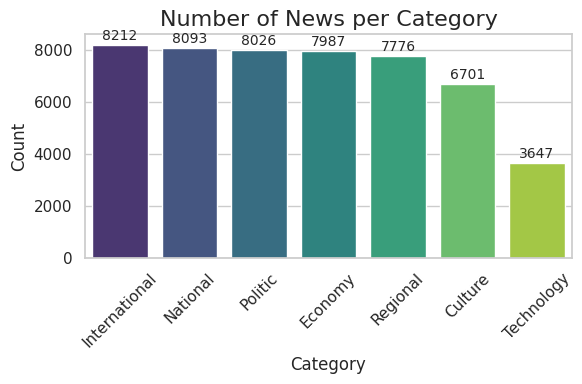

In [92]:
# Let's plot the topics distribution
category_counts = df['category'].value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

for i, count in enumerate(category_counts.values):
    ax.text(i, count + max(category_counts.values)*0.01, str(count), ha='center', va='bottom', fontsize=10)

plt.title("Number of News per Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
